In [ ]:
# Plotting data on a file from internet.
# Using Tesla's stock data as our dataset here.

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import matplotlib.dates as mdates

In [19]:
def graph_data(stock_url):

    stock_price_url = stock_url

    source_code = urllib.request.urlopen(stock_price_url).read().decode() # after reading the data you need to decode it.

    stock_data = []
    split_source = source_code.split('\n')

    for line in split_source[1:]:
        split_line = line.split(',')
        if len(split_line) == 7:
            if 'values' not in line:
                stock_data.append(line)
    # what we did above is removed the unnecessary redundant data and just inluded the stock data which is needed to be plot.

    date, closep, highp, lowp, openp, adj_closep, volume = np.loadtxt(stock_data,
                                                          delimiter=',',
                                                          unpack=True,
                                                          # %Y = full year. 2015
                                                          # %y = partial year 15
                                                          # %m = number month
                                                          # %d = number day
                                                          # %H = hours
                                                          # %M = minutes
                                                          # %S = seconds
                                                          # 12-06-2014
                                                          # %m-%d-%Y
                                                          converters={0: mdates.bytespdate2num('%Y-%m-%d')})
    
    plt.plot_date(date, closep,'-', label='Price')
 
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Tesla Stock Graph')
    plt.legend()
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The bytespdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The strpdate2num class was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use time.strptime or dateutil.parser.parse or datestr2num instead.


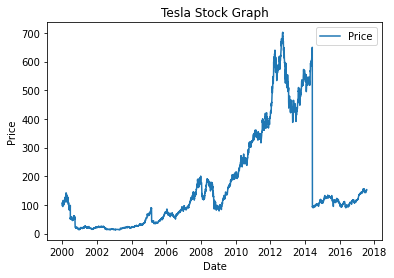

In [20]:
graph_data('http://m.uploadedit.com/busd/1598310550467.txt')